In [5]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:

tea_df = pd.read_csv("scraper/clean_data.csv")
tea_df.head()

,id,name,brand,reviewCount,ratingValue,teaType,ingredients,flavors,soldIn,caffeine,certification,wantIt,ownIt,imageUrl,url
0,65303,2015 Last Thoughts,White 2 Tea,16.0,89.0,Pu-erh Tea,Not available,"Floral, Rainforest, Honeysuckle, Orchids, Pepp...",Not available,Not available,Not available,51.0,20.0,https://media.steepster.com/api/file/kL8dCqJrT...,https://steepster.com/teas/white-2-tea/65303-2...
1,43095,Golden Orchid,Whispering Pines Tea Company,155.0,89.0,Black Tea,"Fujian Xiao Zhong, Vanilla Bean, Yunnan Dian Hong","Dark Chocolate, Chocolate, Dates, Malt, Orchid...",Loose Leaf,High,Not available,315.0,236.0,https://media.steepster.com/api/file/exT0OHWdT...,https://steepster.com/teas/whispering-pines-te...
2,78801,The Silver Moonlight,Chai & Mighty,6.0,89.0,White Tea,White Tea Leaves,"Honey, Lemon, Nuts, Flowers, Lemongrass",Loose Leaf,Low,"Fair Trade, Organic, Vegan",3.0,4.0,https://media.steepster.com/api/file/cmNMAbwSn...,https://steepster.com/teas/chai-and-mighty/788...
3,48058,Cocoa Amore,Whispering Pines Tea Company,85.0,89.0,Black Tea,"Chinese Black Tea, Tahitian Vanilla","Cocoa, Dark Chocolate, Malt, Vanilla, Apple, A...",Loose Leaf,High,Not available,227.0,156.0,https://media.steepster.com/api/file/0vAf5X4Si...,https://steepster.com/teas/whispering-pines-te...
4,32444,Laoshan Bilochun Green,Verdant Tea,19.0,89.0,Green Tea,Not available,"Sweet, Mineral, Nutty, Roasted, Salty, Butter,...",Not available,Not available,Not available,11.0,21.0,https://media.steepster.com/api/file/F0AJQO5DT...,https://steepster.com/teas/verdant-tea/32444-l...


### Indexing flavors

In [7]:
flavors = set()
for tea in tea_df['flavors']:
    for flavs in tea.split(","):
        flavors.add(flavs.strip().title())

ordered_flavors = sorted(list(flavors))
number_of_flavors = len(flavors)

print("Total number of flavors:", number_of_flavors)

flavor_to_index = {}
index_to_flavor = {}
i = 0
for flavor in ordered_flavors:
    flavor_to_index[flavor] = i
    index_to_flavor[i] = flavor
    i += 1
    
print("Index of Floral:", flavor_to_index["Floral"], "\nFlavor with index 5:", index_to_flavor[4])

('Total number of flavors:', 358)
('Index of Floral:', 118, '\nFlavor with index 5:', 'Apple')


### One-hot encoding for Tea Flavors

In [8]:
number_of_teas = tea_df.shape[0]
flavor_mat = np.zeros((number_of_teas, number_of_flavors))

for row in range(number_of_teas):
    for flvr in set([flvr.strip().title() for flvr in tea_df.flavors[row].split(',')]):
        flavor_mat[row][flavor_to_index[flvr]] = 1

flavor_mat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.

In [9]:
print("Flavors of 1st tea:", sorted([flvr.strip().title() for flvr in tea_df.flavors[0].split(',')]))

flavor_df = pd.DataFrame(data=flavor_mat, columns=index_to_flavor.values())
flavor_df.head()

('Flavors of 1st tea:', ['Apple Skins', 'Floral', 'Grapes', 'Honeysuckle', 'Lemon', 'Orchids', 'Pepper', 'Peppercorn', 'Rainforest', 'Sweet', 'Vegetal', 'Vinegar', 'Winter Honey', 'Zucchini'])


,Absinthe,Alcohol,Almond,Anise,Apple,Apple Candy,Apple Skins,Apricot,Artichoke,Artificial,...,White Chocolate,White Grapes,White Wine,Winter Honey,Wood,Yams,Yeast,Yeasty,Yogurt,Zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### One-hot encoding for Tea Types

In [10]:
teaType_dummy = pd.get_dummies(tea_df.teaType)

In [11]:
teaType_dummy.head()

,Black Chai Blend,Black Chai Flowering Green Herbal Oolong Rooibos White Yellow Blend,Black Chai Flowering Herbal Blend,Black Chai Food Blend,Black Chai Fruit Blend,Black Chai Green Blend,Black Chai Green Herbal Blend,Black Chai Herbal Blend,Black Chai Herbal Rooibos Blend,Black Chai Honeybush Blend,...,Pu-erh White Blend,Pu-erh Yerba maté Blend,Rooibos Tea,Rooibos White Blend,Rooibos Yerba maté Blend,Tea,White Tea,White Yerba maté Blend,Yellow Tea,Yerba maté Tea
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
teaType_count = teaType_dummy.sum(axis = 0)
print("Number of unique tea type:", teaType_count.shape[0])

('Number of unique tea type:', 231)


In [13]:
teaType_count.sort_values()[:20]

Flowering Fruit Pu-erh Rooibos Blend                    1
Food Matcha Blend                                       1
Food Green Herbal Blend                                 1
Food Fruit Yerba maté Blend                             1
Flowering Yerba maté Blend                              1
Flowering Oolong Blend                                  1
Flowering Herbal White Blend                            1
Flowering Green White Blend                             1
Flowering Fruit Rooibos Blend                           1
Flowering Fruit Herbal White Blend                      1
Flowering Fruit Herbal Rooibos Blend                    1
Flowering Fruit Green White Blend                       1
Flowering Food Herbal Blend                             1
Food Oolong Blend                                       1
Flowering Food Fruit Herbal Rooibos Yerba maté Blend    1
Chai Oolong White Blend                                 1
Chai Matcha Blend                                       1
Chai Green Yer

In [14]:
teaType_count.sort_values(ascending=False)[:20]

Black Tea               4042
Green Tea               2112
Pu-erh Tea              1896
Oolong Tea              1842
Herbal Tea              1037
White Tea                591
Rooibos Tea              520
Black Fruit Blend        397
Fruit Herbal Blend       336
Black Chai Blend         221
Tea                      212
Fruit Green Blend        188
Fruit Tea                170
Matcha Tea               116
Herbal Rooibos Blend     108
Green Herbal Blend       107
Chai Tea                  80
Yerba maté Tea            80
Fruit White Blend         77
Fruit Rooibos Blend       72
dtype: int64

### One-hot encoding for Brands

In [15]:
brand_dummies = pd.get_dummies(tea_df.brand)

#### Many invalid inputs in "Brand"

In [16]:
brand_count = brand_dummies.sum(axis=0)
brand_count[brand_count==1]

1001Kruiden                                                     1
365 Organic                                                     1
:D                                                              1
A Tea Affair                                                    1
ABC Tea                                                         1
ABC Tea House                                                   1
AKA Dwelling                                                    1
AMANA                                                           1
ASDA                                                            1
ASI Tea company                                                 1
Aap Ki Pasand                                                   1
Adagio Custom Blends, Aun-Juli Riddle                           1
Adagio Custom Blends, Brittany Kienke                           1
Adagio Custom Blends, Cheryl Yi                                 1
Adagio Custom Blends, Elizabeth Lane                            1
Adagio Cus

### One-hot encoding for Ingredients

In [17]:
ingredients_dummy = tea_df.ingredients.str.get_dummies(sep=', ')

In [18]:
ingredients_dummy.head()

,Acerola Cherry,Agave,Aleppo Chili,Alfalfa Leaf,Allspice,Almond,Almonds,Aloe Vera,Ancho Chili,Anise,...,Wintergreen,Yabao,Yellow Tea Leaves,Yellowdock,Yerba Mate Leaves,Young Hyson Green Tea,Yunnan Black Tea,Yunnan Dian Hong,Yuzu,Zhenshan Xiaozhong Tea
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
ingredients_count = ingredients_dummy.sum(axis = 0).sort_values()

print("Number of ingredients in only one tea:", ingredients_count[ingredients_count == 1].shape[0])
col_del = list(ingredients_count[ingredients_count == 1].index)

('Number of ingredients in only one tea:', 44)


In [20]:
ingredients_dummy.drop(col_del, axis=1, inplace=True)

In [21]:
ingredients_dummy.shape

(15641, 496)

### One-hot encoding for Certification

In [22]:
certification_dummy = tea_df.certification.str.get_dummies(sep=', ')

In [23]:
certification_count = certification_dummy.sum(axis = 0).sort_values()
certification_count

Kosher             272
Vegan              301
Fair Trade         426
Organic           1693
Not available    13559
dtype: int64

### One-hot encoding for Sold In and Caffeine

In [24]:
soldIn_dummy = tea_df.soldIn.str.get_dummies(sep=', ')

In [25]:
caffeine_dummy = pd.get_dummies(tea_df["caffeine"])

In [26]:
soldIn_dummy.sum(axis = 0)

Bulk             1225
Loose Leaf       7586
Not available    6637
Sachet            557
Tea Bag          1208
dtype: int64

In [27]:
caffeine_dummy.sum(axis = 0)

Caffeine Free     1386
Decaffeinated      124
High               923
Low                785
Medium            1655
Not available    10768
dtype: int64

### Features Representation

In [28]:
tea_df_dummy = pd.concat([flavor_df, teaType_dummy, ingredients_dummy,\
                          certification_dummy, soldIn_dummy, caffeine_dummy\
                          ], axis = 1)

In [29]:
tea_df_dummy.columns[-100:]

Index([u'Rose', u'Rose Blossom Leaves', u'Rose Buds', u'Rose Buds And Petals',
       u'Rose Hip Peels', u'Rose Hips', u'Rose Petals', u'Rosemary',
       u'Safflower', u'Safflower Petals', u'Safflowers', u'Saffron', u'Sage',
       u'Saigon Cinnamon', u'Sarsaparilla', u'Sea Buckthorn Berries',
       u'Sea Salt', u'Select Green Teas', u'Sencha', u'Sencha Powder',
       u'Sesame', u'Shatavari Root', u'Shou Mei White Tea',
       u'Shredded Coconut', u'Skullcap', u'Sliver Lime Flower', u'Sour Cherry',
       u'South Indian Flower Orange Pekoe Black Tea', u'Spearmint', u'Spices',
       u'Sprinkles', u'St. John's Wort', u'Star Anise Bits', u'Starfruit',
       u'Stevia Leaf', u'Stinging Nettle Leaves', u'Strawberry',
       u'Strawberry Leaves', u'Sugar', u'Sugar Crystals', u'Sugar Sprinkles',
       u'Sunflower Blossoms', u'Sunflower Petals', u'Sunflowers',
       u'Sweet Potato', u'Tahitian Vanilla', u'Tangerine', u'Tarragon',
       u'Tea Twigs', u'Thyme', u'Toffee', u'Tulsi', u'Tuls

In [30]:
tea_df_dummy.to_csv("tea_df_dummy.csv")

In [31]:
#########Preprocessing End##################################################

In [48]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline
tea_df = pd.read_csv("scraper/clean_data.csv").iloc[:10000, :]
tea_df_dummy = pd.read_csv("tea_df_dummy.csv").iloc[:10000, :]
tea_df_dummy.drop("Unnamed: 0", axis = 1, inplace=True)
tea_df.head()

,id,name,brand,reviewCount,ratingValue,teaType,ingredients,flavors,soldIn,caffeine,certification,wantIt,ownIt,imageUrl,url
0,65303,2015 Last Thoughts,White 2 Tea,16.0,89.0,Pu-erh Tea,Not available,"Floral, Rainforest, Honeysuckle, Orchids, Pepp...",Not available,Not available,Not available,51.0,20.0,https://media.steepster.com/api/file/kL8dCqJrT...,https://steepster.com/teas/white-2-tea/65303-2...
1,43095,Golden Orchid,Whispering Pines Tea Company,155.0,89.0,Black Tea,"Fujian Xiao Zhong, Vanilla Bean, Yunnan Dian Hong","Dark Chocolate, Chocolate, Dates, Malt, Orchid...",Loose Leaf,High,Not available,315.0,236.0,https://media.steepster.com/api/file/exT0OHWdT...,https://steepster.com/teas/whispering-pines-te...
2,78801,The Silver Moonlight,Chai & Mighty,6.0,89.0,White Tea,White Tea Leaves,"Honey, Lemon, Nuts, Flowers, Lemongrass",Loose Leaf,Low,"Fair Trade, Organic, Vegan",3.0,4.0,https://media.steepster.com/api/file/cmNMAbwSn...,https://steepster.com/teas/chai-and-mighty/788...
3,48058,Cocoa Amore,Whispering Pines Tea Company,85.0,89.0,Black Tea,"Chinese Black Tea, Tahitian Vanilla","Cocoa, Dark Chocolate, Malt, Vanilla, Apple, A...",Loose Leaf,High,Not available,227.0,156.0,https://media.steepster.com/api/file/0vAf5X4Si...,https://steepster.com/teas/whispering-pines-te...
4,32444,Laoshan Bilochun Green,Verdant Tea,19.0,89.0,Green Tea,Not available,"Sweet, Mineral, Nutty, Roasted, Salty, Butter,...",Not available,Not available,Not available,11.0,21.0,https://media.steepster.com/api/file/F0AJQO5DT...,https://steepster.com/teas/verdant-tea/32444-l...


In [49]:
tea_df_dummy.head()

,Absinthe,Alcohol,Almond,Anise,Apple,Apple Candy,Apple Skins,Apricot,Artichoke,Artificial,...,Loose Leaf,Not available.2,Sachet,Tea Bag,Caffeine Free,Decaffeinated,High,Low,Medium,Not available.3
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


### SVD

In [50]:
from sklearn.preprocessing import normalize
#row normalize
temp_matrix = normalize(tea_df_dummy.as_matrix(), axis = 0)
svd_matrix = temp_matrix.transpose()

In [51]:
print(type(svd_matrix))
print(svd_matrix.shape)

<type 'numpy.ndarray'>
(1101, 10000)


In [52]:
temp_matrix[0][:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.16222142, 0.        , 0.        , 0.        ])

In [53]:
from scipy.sparse.linalg import svds
u, s, v_trans = svds(svd_matrix, k=100)

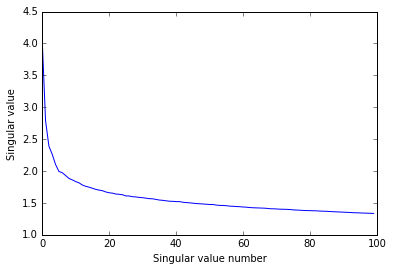

In [54]:
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [55]:
predictors_compressed, _, teas_compressed = svds(svd_matrix, k=20)
teas_compressed = teas_compressed.transpose()

print(predictors_compressed.shape)
print(teas_compressed.shape)

(1101, 20)
(10000, 20)


### project dummy_matrix onto 2D

In [36]:
from sklearn.manifold import TSNE

In [37]:
tsne = TSNE(verbose=1)
print(teas_compressed.shape)
subset = teas_compressed[:5000, :]
projected_teas = tsne.fit_transform(subset)
print(projected_teas.shape)

(15641, 20)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.024s...
[t-SNE] Computed neighbors for 5000 samples in 1.793s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.003742
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.668961
[t-SNE] Error after 1000 iterations: 1.553543
(5000, 2)


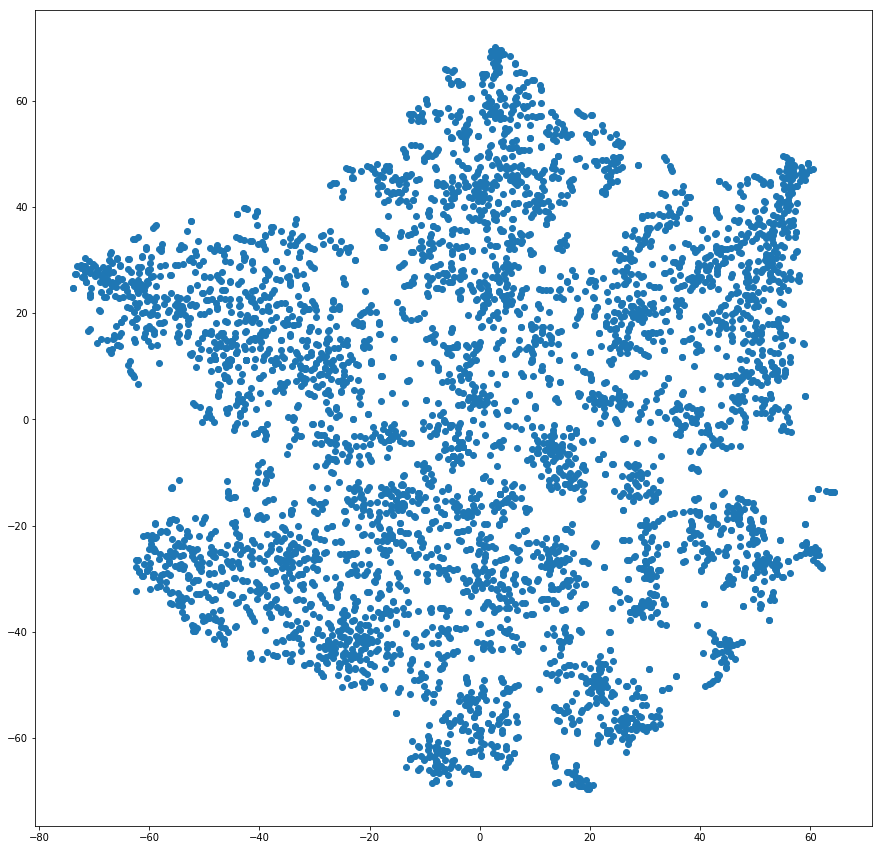

In [38]:
plt.figure(figsize=(15,15))
plt.scatter(projected_teas[:,0],projected_teas[:,1])
plt.show()

## Clustering

In [39]:
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], 'o',
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 12})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('on')
    plt.tight_layout()

In [40]:
# 2D embedding of the digits dataset
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='ward', n_clusters=17)
clustering.fit(projected_teas)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=17,
            pooling_func=<function mean at 0x000002278118B9D8>)

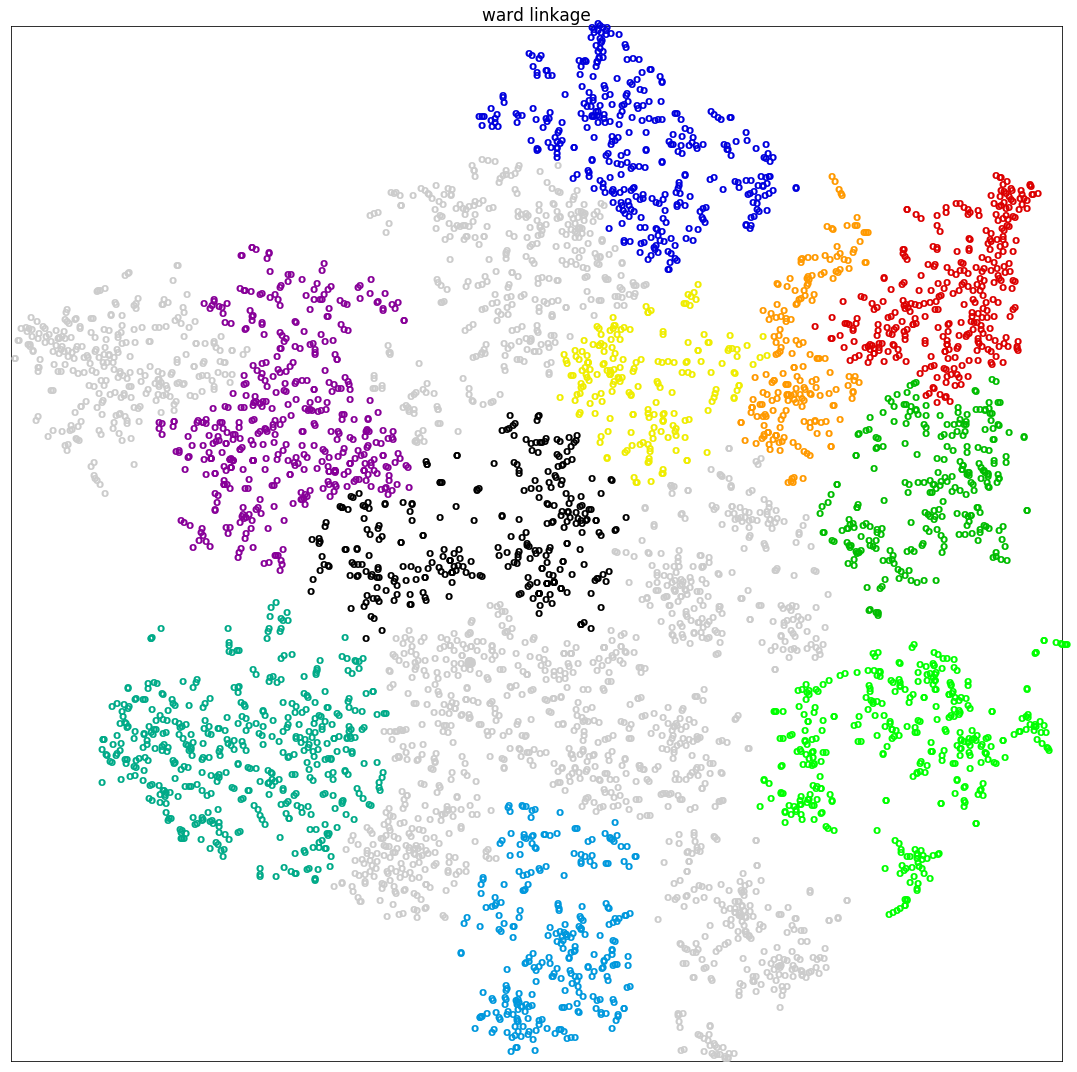

In [41]:
plot_clustering(projected_teas, clustering.labels_, "ward linkage")
plt.show()

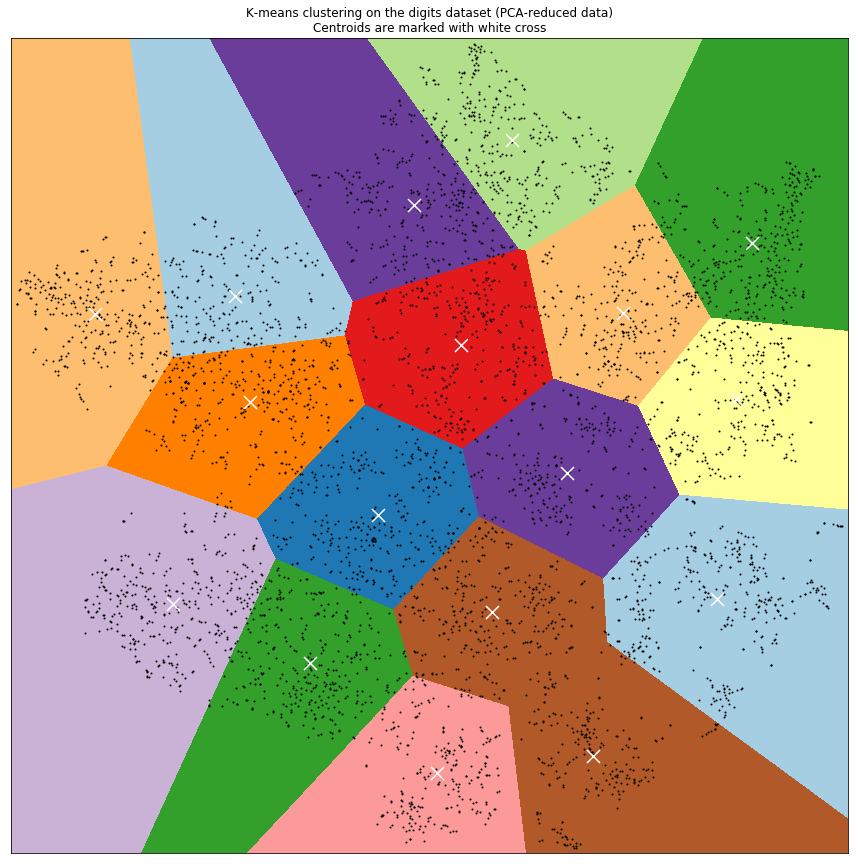

In [43]:
# Visualize the results on PCA-reduced data
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=17, n_init=10, random_state = 0)
kmeans.fit(projected_teas)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = projected_teas[:, 0].min() - 1, projected_teas[:, 0].max() + 1
y_min, y_max = projected_teas[:, 1].min() - 1, projected_teas[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.figure(figsize=(15, 15))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(projected_teas[:, 0], projected_teas[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Use Silhouette Score to decide number of clusters

In [67]:
range_n_clusters = np.arange(11, 20, 1)     # clusters range (guess the range from SVD result)
dataToFit = teas_compressed             # sample data, shape(10000, 20)

In [68]:
def silhouette_score(range_n_clusters, dataToFit):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    silhouette_scores = np.ones(len(range_n_clusters))
    for i in range(len(range_n_clusters)):
        clusterer = KMeans(n_clusters=range_n_clusters[i], random_state=0).fit(dataToFit)
        cluster_labels = clusterer.labels_
        silhouette_scores[i] = silhouette_score(dataToFit, cluster_labels)
    return silhouette_scores

In [69]:
silhouette_scores = silhouette_score(range_n_clusters, dataToFit)
print (silhouette_scores)
print ('best_clusters: ', range_n_clusters[0] +  np.argmax(silhouette_scores))

[0.06325143 0.17777738 0.20236834 0.27403538 0.10515489 0.25791018
 0.22724615 0.13941463 0.13719679]
('best_clusters: ', 14)


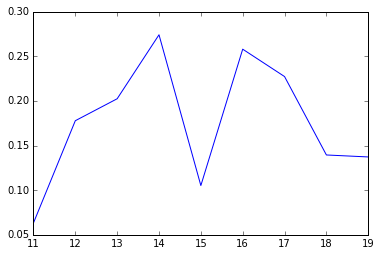

In [70]:
plt.plot(range_n_clusters, silhouette_scores)

In [ ]:
################################################################################

In [71]:
def kmeans_clustering(tea_df_dummy, tea_id, n_clusters):
    '''
    We use kmeans clustering to classify similar teas, 
    each tea has a label showing which cluster this tea belongs to.
    params:
    dataframe: pd.DataFrame, tea dataframe encoded using dummy variables 
                (without name, id...)
    n_clusters: int, number of clusters to be classified into
    id_: pd.Series, id of all teas
    
    return:
    df: A pd.DataFrame with three features of all teas: 'id', 'label'
    cos_sim_mat: cosine similarity matrix of tea_df_dummy
    
    '''
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import scale
    np.random.seed(42)
    data = scale(tea_df_dummy.as_matrix())
    kmeans = KMeans(n_clusters=n_clusters, random_state = 0).fit(data)
    labels = pd.Series(kmeans.labels_)
    df = pd.concat([tea_id, labels], axis = 1)
    df.columns = ['id', 'label']
    
    # Calculate cosine similarity matrix
    mat = np.transpose(tea_df_dummy.as_matrix())
    d = np.matmul(np.transpose(mat), mat)
    norm = (mat * mat).sum(0, keepdims=True) ** .5
    cos_sim_mat = d / norm / np.transpose(norm)
    df = pd.concat([df, pd.DataFrame(cos_sim_mat)], axis = 1)
    return df

In [72]:
id_label_df = kmeans_clustering(tea_df_dummy, tea_df.id, 14)

In [73]:
id_label_df.head()

,id,label,0,1,2,3,4,5,6,7,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,65303,4,1.000000,0.150619,0.066227,0.085203,0.315789,0.183942,0.105263,0.118470,...,0.520266,0.081111,0.345857,0.367884,0.048912,0.061314,0.072548,0.468293,0.374634,0.381771
1,43095,4,0.150619,1.000000,0.075810,0.414511,0.150619,0.298292,0.090371,0.203419,...,0.099258,0.092848,0.118771,0.245652,0.167968,0.245652,0.083045,0.053606,0.107211,0.327761
2,78801,12,0.066227,0.075810,1.000000,0.107211,0.066227,0.115728,0.331133,0.149071,...,0.000000,0.408248,0.000000,0.077152,0.123091,0.077152,0.000000,0.117851,0.000000,0.000000
3,48058,4,0.085203,0.414511,0.107211,1.000000,0.085203,0.198517,0.085203,0.143839,...,0.140372,0.065653,0.223957,0.248146,0.079181,0.297775,0.058722,0.075810,0.151620,0.309016
4,32444,1,0.315789,0.150619,0.066227,0.085203,1.000000,0.245256,0.157895,0.118470,...,0.433555,0.081111,0.415029,0.367884,0.146735,0.061314,0.072548,0.374634,0.374634,0.318142


In [74]:
id_label_df.shape

(10000, 10002)

In [43]:
def query_tea_with_same_label(q_id, id_label_df, top_n):
    '''
    This function takes a query of tea Id 
    and return a list of (id, recommendation_score) pairs sorted by 
    recommendation scores
    
    params:
    q_id: integer, the id of the tea which you want to find teas similar with
    id_label_df: pd.DataFrame, a dataframe having
                 id, label and cosine similarity matrix of all teas
    top_n: integer, return top n results
    cos_sim_mat: np.matrix, the cosine similarity matrix of tea_df_dummy
    
    return:
    list: a list of (id, cossim_score) pairs which has the same label as q_id 
            and sorted by their recommendation score
    '''
    q_label = id_label_df.label[id_label_df.id == q_id].tolist()[0] # get label of q_id
    q_idx = id_label_df.index[id_label_df.id==q_id].tolist()[0] # get idx of q_id
    sim_id = id_label_df.id[id_label_df.label==q_label].tolist() # get id of similar teas
    sim_id_idx = id_label_df.index[id_label_df.label==q_label].tolist() #get idx of similar teas
    sim_score = id_label_df.iloc[q_idx, 2+np.array(sim_id_idx)].tolist()
    id_score_pair = list(zip(sim_id, sim_score))
    return sorted(id_score_pair, key=lambda tup: tup[1], reverse=True)[1:top_n+1]

In [44]:
res_id1 = query_tea_with_same_label(152, id_label_df, 10)
res_id1

[(23052, 0.9045340337332909),
 (31136, 0.8819171036881968),
 (26557, 0.8819171036881968),
 (24368, 0.8660254037844387),
 (7925, 0.8249579113843054),
 (16180, 0.8249579113843054),
 (328, 0.8249579113843054),
 (39753, 0.8249579113843054),
 (32751, 0.8249579113843054),
 (14681, 0.8249579113843054)]

In [45]:
res_id2 = query_tea_with_same_label(7433, id_label_df, 10)
res_id2

[(11189, 0.8660254037844386),
 (18827, 0.8660254037844386),
 (51911, 0.8660254037844386),
 (15068, 0.8333333333333335),
 (15893, 0.8333333333333335),
 (29218, 0.8333333333333335),
 (5755, 0.8333333333333335),
 (29191, 0.8333333333333335),
 (3351, 0.8333333333333335),
 (18050, 0.8333333333333335)]

In [46]:
res_id3 = query_tea_with_same_label(2398, id_label_df, 10)
res_id3

[(78101, 0.7302967433402215),
 (61930, 0.7144345083117604),
 (44666, 0.7071067811865477),
 (45613, 0.7071067811865477),
 (45272, 0.6735753140545635),
 (80843, 0.6390096504226939),
 (47158, 0.6123724356957945),
 (50767, 0.6123724356957945),
 (57676, 0.6123724356957945),
 (53958, 0.6092717958449424)]